<a id="import"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Water Potability Prediction Model</p>


## Introduction :

### Access to safe drinking water is a fundamental human right and a crucial aspect of public health. This project aims to predict the potability of water samples using various machine learning techniques. By analyzing different water quality parameters, we can classify water samples as either potable (safe for drinking) or non-potable (unsafe for drinking).

<a id="basic"></a>
# <b><span style='color:#ff826e'>1 |</span><span style='color:blue'> Importing Libraries</span></b>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import plotly.express as px
from sklearn.svm import SVC   
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

<a id="basic"></a>
# <b><span style='color:#ff826e'> 2 |</span><span style='color:blue'> Import Data</span></b>

In [2]:
 df=pd.read_csv(r"C:\Users\hp\Desktop\capston project\Water Potability Prediction\water_potability.csv")
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

<a id="basic"></a>
# <b><span style='color:#ff826e'>.|</span><span style='color:blue'> Water Potability Parameter</span></b>

The dataset used in this project contains several water quality parameters, including:

- **ph**: Measures the acidity or alkalinity of water.
- **Hardness**: Indicates the concentration of calcium and magnesium ions.
- **Solids**: Total dissolved solids in the water.
- **Chloramines**: Amount of chlorine compounds used for disinfection.
- **Sulfate**: Concentration of sulfate ions.
- **Conductivity**: Water’s ability to conduct electricity.
- **Organic Carbon**: Amount of organic carbon present.
- **Trihalomethanes**: By-products of chlorination.
- **Turbidity**: Clarity of water.
y of water.
ty of water.
ty of water.
 water.

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
print(df.isnull().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


<a id="basic"></a>
# <b><span style='color:#ff826e'> 3 |</span><span style='color:blue'> Removing rows of missing values</span></b>

In [5]:
df = df.dropna()
df

ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
5       280.467916        8.399735        54.917862   2.559708           0  
6       283.651634       13.789695        84.603556   2.672989           0  
7       474.607645       12.363817        62.798309   4.401425           0  
...            ...             ...              ...        ...         ...  
3267    390.410231        9.899115        55.069304   4.613843           1  
3268    329.266002       16.217303        28.878601   3.442983           1  
3269    439.893618       16.172755        41.558501   4.369264           1  
3270    415.886955       12.067620        60.419921   3.669712           1  
3271    526.424171       13.894419        66.687695   4.435821           1  

[2011 rows x 10 columns]

In [6]:
print(df.isnull().sum())


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [7]:
df.describe().T

count          mean          std         min           25%  \
ph               2011.0      7.085990     1.573337    0.227499      6.089723   
Hardness         2011.0    195.968072    32.635085   73.492234    176.744938   
Solids           2011.0  21917.441374  8642.239815  320.942611  15615.665390   
Chloramines      2011.0      7.134338     1.584820    1.390871      6.138895   
Sulfate          2011.0    333.224672    41.205172  129.000000    307.632511   
Conductivity     2011.0    426.526409    80.712572  201.619737    366.680307   
Organic_carbon   2011.0     14.357709     3.324959    2.200000     12.124105   
Trihalomethanes  2011.0     66.400859    16.077109    8.577013     55.952664   
Turbidity        2011.0      3.969729     0.780346    1.450000      3.442915   
Potability       2011.0      0.403282     0.490678    0.000000      0.000000   

                          50%           75%           max  
ph                   7.027297      8.052969     14.000000  
Hardness           197.191839    216.441070    317.338124  
Solids           20933.512750  27182.587067  56488.672413  
Chloramines          7.143907      8.109726     13.127000  
Sulfate            332.232177    359.330555    481.030642  
Conductivity       423.455906    482.373169    753.342620  
Organic_carbon      14.322019     16.683049     27.006707  
Trihalomethanes     66.542198     77.291925    124.000000  
Turbidity            3.968177      4.514175      6.494749  
Potability           0.000000      1.000000      1.000000

In [8]:
df.Potability.value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

<a id="basic"></a>
# <b><span style='color:#ff826e'> 4|</span><span style='color:blue'> visualization of data </span></b>>>

### Distribution of pH

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


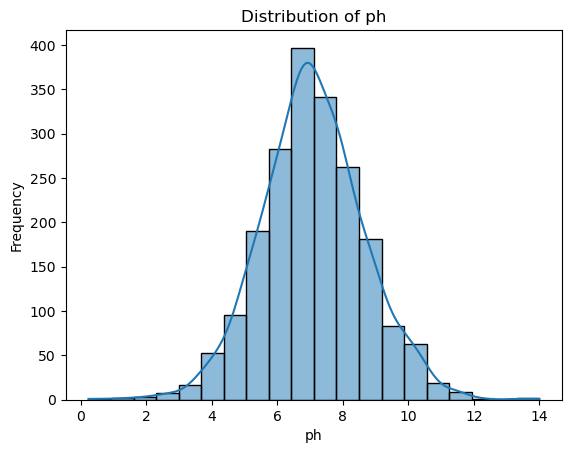

In [9]:
sns.histplot(df["ph"], bins=20, kde=True)
plt.xlabel("ph")
plt.ylabel("Frequency")
plt.title("Distribution of ph")
plt.show()


## Correlation Analysis :

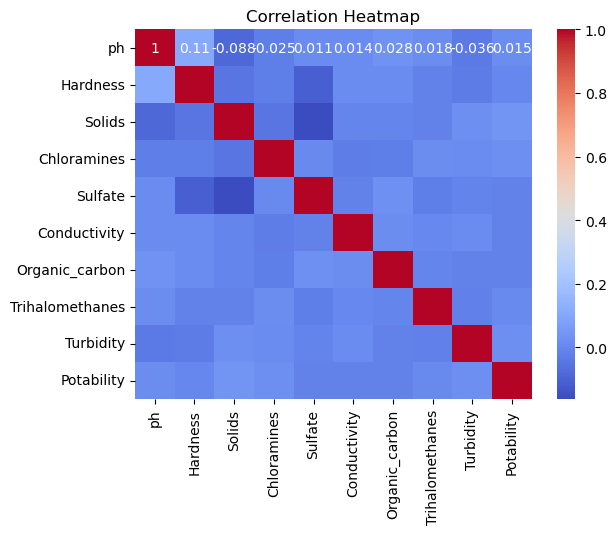

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

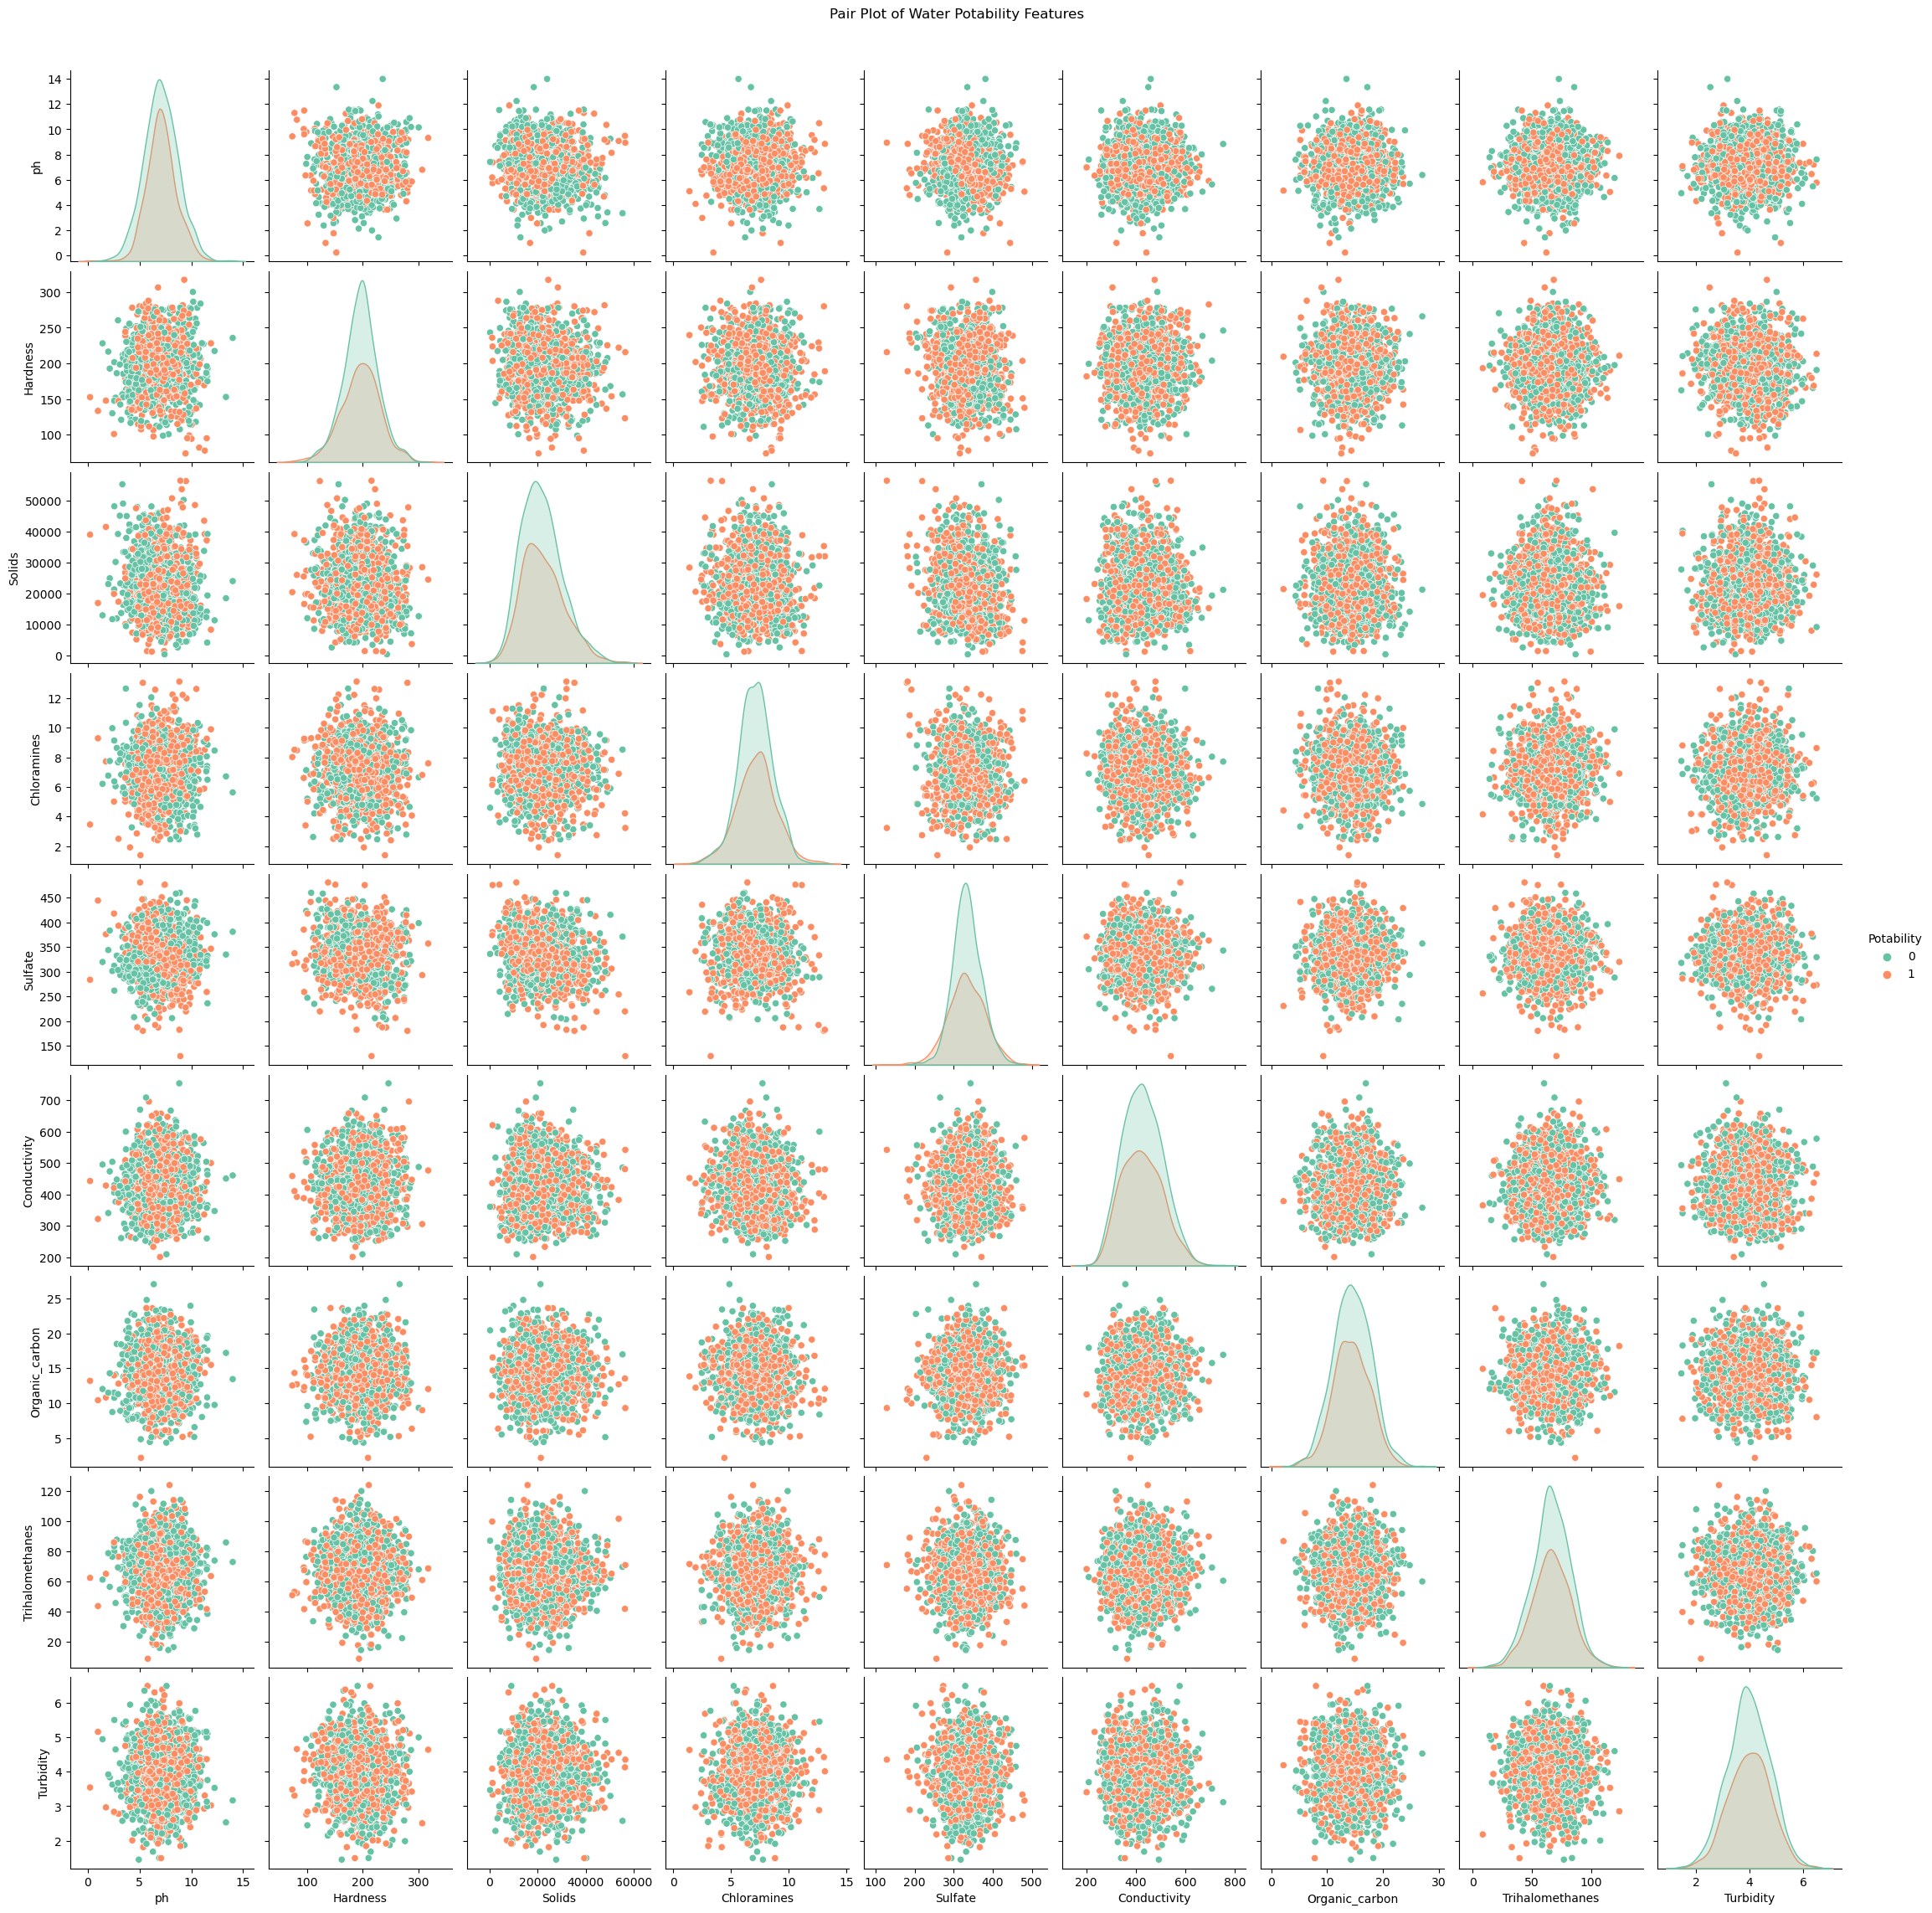

In [13]:
sns.pairplot(df, hue="Potability", diag_kind="kde", palette="Set2")
plt.suptitle("Pair Plot of Water Potability Features", y=1.02)
plt.show()

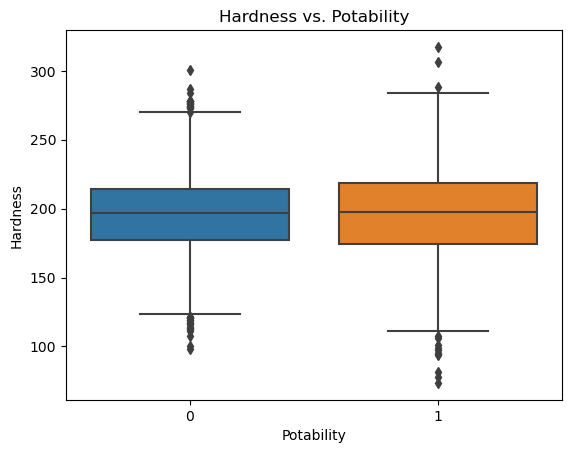

In [14]:
sns.boxplot(x="Potability", y="Hardness", data=df)
plt.xlabel("Potability")
plt.ylabel("Hardness")
plt.title("Hardness vs. Potability")
plt.show()


<a id="basic"></a>
# <b><span style='color:#ff826e'> 5|</span><span style='color:blue'>DATA PROCESSING - SPLITTING THE DATA INTO TRAIN AND TEST SETS</span></b>>>>
|
FAQs


In [22]:
X = df.drop(columns=['Potability']) 
y = df['Potability']

In [23]:
# Split the dataset ( 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X.shape,y.shape

((2011, 9), (2011,))

<a id="basic"></a>
# <b><span style='color:#ff826e'> 6|</span><span style='color:blue'>Model Testing and Evaluation</span></b>

## Logistic Regression

In [25]:
model_lr=LogisticRegression()

In [26]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
pred_lr = model_lr.predict(X_test)

In [28]:
accuracy_score_lr= accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

57.32009925558312

## KNeighbors Classifier



In [29]:
model_knn = KNeighborsClassifier()

In [30]:
for i in range (4,16):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(X_train,y_train)
  pred_knn = model_knn.predict(X_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(accuracy_score_knn )
                                



0.56575682382134
0.5409429280397022
0.5508684863523573
0.5459057071960298
0.5781637717121588
0.575682382133995
0.56575682382134
0.5508684863523573
0.5632754342431762
0.5384615384615384
0.5508684863523573
0.5459057071960298


In [31]:
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(X_train,y_train)
  pred_knn = model_knn.predict(X_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(accuracy_score_knn*100 )
                                

54.59057071960298


## Random Forest Classifier

In [32]:
model_rf = RandomForestClassifier()


In [33]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
pred_rf = model_rf.predict(X_test)


In [35]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

67.4937965260546

## Decision Tree Classifier

In [36]:
model_dt = DecisionTreeClassifier(max_depth = 4)

In [37]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [38]:
pred_dt = model_dt.predict(X_test)


In [39]:
accuracy_score_dt= accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

63.52357320099256

In [40]:
cm2= confusion_matrix(y_test,pred_dt)
cm2

array([[208,  23],
       [124,  48]], dtype=int64)

## XG Boost Classifier

In [41]:
model_xgb = XGBClassifier(n_estimators=200,learning_rate=0.05)

In [42]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
pred_xgb = model_xgb.predict(X_test)

In [44]:
accuracy_score_xgb = accuracy_score(y_test,pred_xgb)
accuracy_score_xgb*100

64.51612903225806

## support vector machine 

In [45]:
model_svm = SVC(kernel="rbf")

In [46]:
model_svm.fit(X_train,y_train)

SVC()

In [47]:
pred_svm = model_svm.predict(X_test)

In [48]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

57.32009925558312

## AdaBoost Classifier

In [49]:
model_ada = AdaBoostClassifier(n_estimators=200,learning_rate = 0.01)

In [50]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=200)

In [51]:
pred_ada = model_ada.predict(X_test)

In [52]:
accuracy_score_ada = accuracy_score(y_test,pred_ada)

In [53]:
accuracy_score_ada*100

59.30521091811415

<a id="basic"></a>
# <b><span style='color:#ff826e'> 7|</span><span style='color:blue'> Accuracy Score by Models</span></b>


In [54]:
models = pd.DataFrame({
    "Models":["Logistic Regression",
              "support vector machine",
              "KNeighbors Classifier",
              "Random Forest Classifier",
              "Decision Tree Classifier",
              "XG Boost Classifier",
             "AdaBoost Classifier"],"Accuracy score" : [accuracy_score_lr, accuracy_score_svm,accuracy_score_knn,accuracy_score_rf,accuracy_score_dt,accuracy_score_xgb,accuracy_score_ada ]})


In [55]:
models*100

Models  Accuracy score
0  Logistic RegressionLogistic RegressionLogistic...       57.320099
1  support vector machinesupport vector machinesu...       57.320099
2  KNeighbors ClassifierKNeighbors ClassifierKNei...       54.590571
3  Random Forest ClassifierRandom Forest Classifi...       67.493797
4  Decision Tree ClassifierDecision Tree Classifi...       63.523573
5  XG Boost ClassifierXG Boost ClassifierXG Boost...       64.516129
6  AdaBoost ClassifierAdaBoost ClassifierAdaBoost...       59.305211

In [115]:
models = models.sort_values(by="Accuracy score", ascending=True)


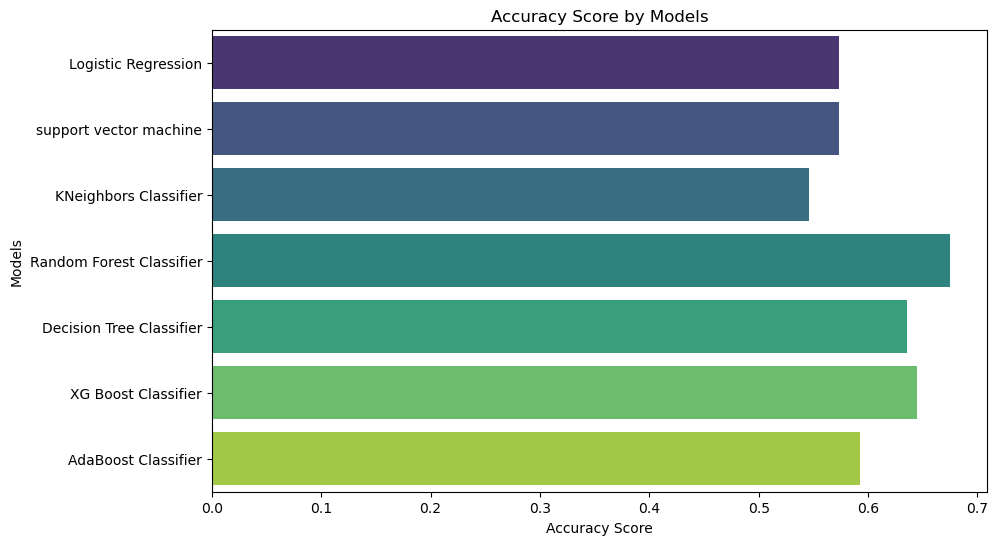

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy score", y="Models", data=models, palette="viridis")
plt.title('Accuracy Score by Models')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.show()


##

<a id="basic"></a>
# <b><span style='color:#ff826e'> 8|</span><span style='color:blue'> Cross-Validation for Model Evaluation</span></b>

### The cross-validation to evaluate the performance of your model. Cross-validation is a technique used to assess how well a model generalizes to an independent dataset.

In [57]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

Cross-validation scores: [0.60297767 0.66169154 0.67661692 0.60199005 0.68905473]
Mean CV score: 0.6464661802649285


## Initializing Classifiers


In [58]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'XG Boost Classifier': XGBClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier()
}

<a id="basic"></a>
# <b><span style='color:#ff826e'> 9|</span><span style='color:blue'> Hyperparameter Grids for Classifiers</span></b>


### This  defines a dictionary of hyperparameter grids for various machine learning classifiers. These grids are used for hyperparameter tuning, which is the process of finding the best combination of hyperparameters for each classifier to improve their performance.


In [59]:
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    'Support Vector Machine': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'KNeighbors Classifier': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'Random Forest Classifier': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'Decision Tree Classifier': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__criterion': ['gini', 'entropy'] 
    },
    'XG Boost Classifier': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5, 7]
    },
    'AdaBoost Classifier': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1]
    }
}

<a id="basic"></a>
# <b><span style='color:#ff826e'> 10|</span><span style='color:blue'> Hyperparameter Tuning and Model Evaluation</span></b>

In [128]:
results = [] 

for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('classifier', classifier)
    ])

    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Store the results
    results.append({
        'Model': name,
        'Best Score': grid_search.best_score_,
        'Best Params': grid_search.best_params_
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


                      Model  Best Score  \
0       Logistic Regression    0.606970   
1    Support Vector Machine    0.602612   
2     KNeighbors Classifier    0.560341   
3  Random Forest Classifier    0.685935   
4  Decision Tree Classifier    0.629997   
5       XG Boost Classifier    0.670399   
6       AdaBoost Classifier    0.620033   

                                         Best Params  
0  {'classifier__C': 10, 'classifier__solver': 'l...  
1  {'classifier__C': 0.1, 'classifier__kernel': '...  
2  {'classifier__n_neighbors': 5, 'classifier__we...  
3  {'classifier__max_depth': None, 'classifier__n...  
4  {'classifier__criterion': 'entropy', 'classifi...  
5  {'classifier__learning_rate': 0.01, 'classifie...  
6  {'classifier__learning_rate': 0.1, 'classifier...  


<a id="basic"></a>
# <b><span style='color:#ff826e'> 11|</span><span style='color:blue'> Model Evaluation: Confusion Matrix and Classification Report</span></b>>

### To evaluate the performance of best-performing model on the test dataset. It generates a confusion matrix and a classification report, which provide detailed insights into the model’s performance.

              precision    recall  f1-score   support

 Not Potable       0.66      0.87      0.75       231
     Potable       0.70      0.40      0.51       172

    accuracy                           0.67       403
   macro avg       0.68      0.63      0.63       403
weighted avg       0.68      0.67      0.65       403

Confusion Matrix:
[[202  29]
 [104  68]]


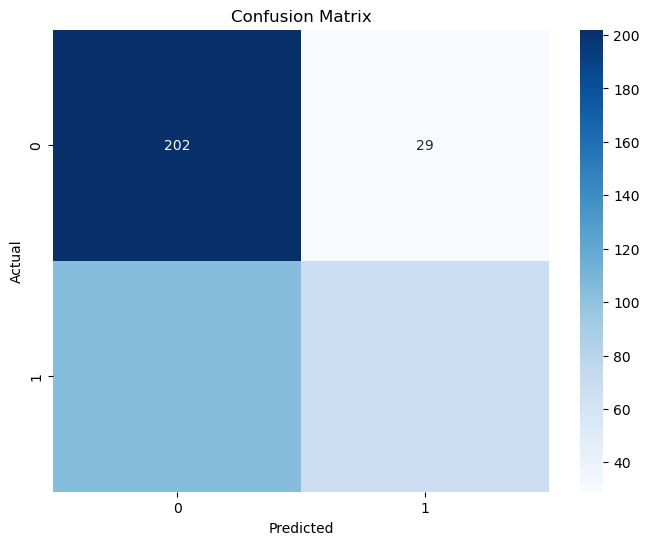

In [60]:
y_true = y_test
y_pred = model.predict(X_test)
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Not Potable', 'Potable'])
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




<a id="basic"></a>
# <b><span style='color:#ff826e'> 12|</span><span style='color:blue'> Plotting Feature Importances</span></b>

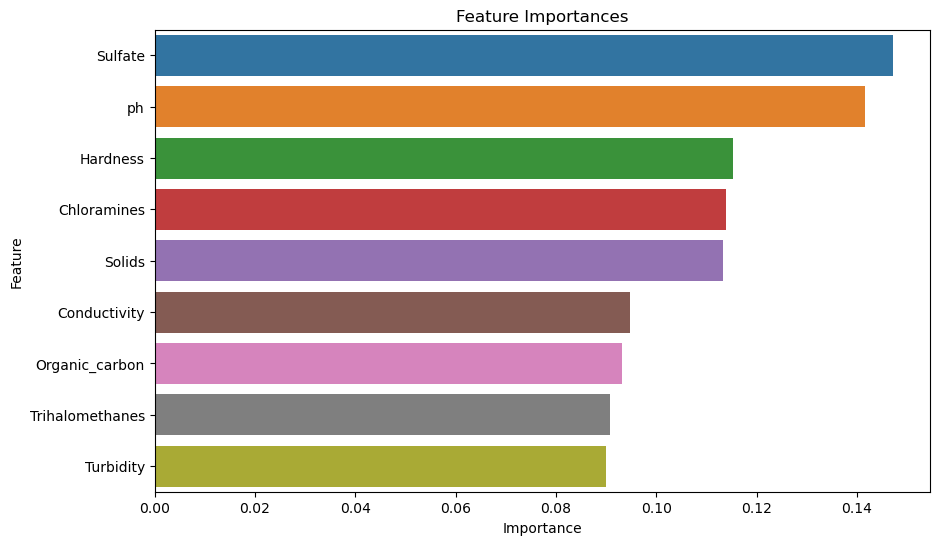

In [61]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


<a id="basic"></a>
# <b><span style='color:#ff826e'> 14|</span><span style='color:blue'> Saving and Loading the Model with Joblib</span></b>

In [62]:
import joblib

# Save the model
joblib.dump(model, 'water_potability_model.joblib')




['water_potability_model.joblib']

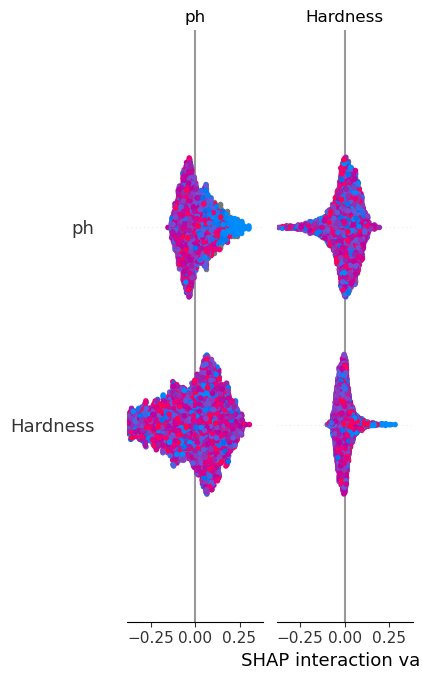

In [71]:
import joblib
import pandas as pd
import shap
model = joblib.load(r"C:\Users\hp\Desktop\water potability prediction\water_potability_model.joblib")

data = pd.read_csv(r"C:\Users\hp\Desktop\capston project\Water Potability Prediction\water_potability.csv")


X = data.drop(columns=['Potability'])
y = data['Potability']

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X, plot_type="bar")


